In [98]:
import numpy as np
import scipy.special
#import tensorflow as tf
#import teras
import matplotlib.pyplot
%matplotlib inline

In [99]:
class neuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        self.lr=learningrate
        self.wih=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        self.activation_function=lambda x:scipy.special.expit(x)
        pass
    def train(self,inputs_list,targets_list):
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        hidden_inputs=np.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=np.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        output_errors=targets-final_outputs
        hidden_errors=np.dot(self.who.T,output_errors)
        self.who+=self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs))
        self.wih+=self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),np.transpose(inputs))
        pass
    def query(self,inputs_list):
        inputs=np.array(inputs_list,ndmin=2).T
        hidden_inputs=np.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=np.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        return final_outputs
        pass

In [119]:
input_nodes=784
hidden_nodes=100
output_nodes=10
learning_rate=0.07

In [120]:
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [121]:
training_data_file=open("mnist_train.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

In [127]:
epochs=2
for e in range(epochs):
    for record in training_data_list:
        all_values=record.split(',')
        inputs=(np.asfarray(all_values[1:])/255.0*0.99)+0.01
        targets=np.zeros(onodes)+0.01
        targets[int(all_values[0])]=0.99
        n.train(inputs,targets)
        pass
    pass

In [128]:
test_data_file=open("mnist_test.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()
all_values=test_data_list[0].split(',')
print(all_values[0])
n.query((np.asfarray(all_values[1:])))

7


array([[1.69883812e-03],
       [3.93121859e-03],
       [4.57347517e-03],
       [6.24070490e-03],
       [9.23983640e-04],
       [4.00045437e-03],
       [3.05732027e-02],
       [9.95848022e-01],
       [6.39931617e-03],
       [1.54248766e-02]])

In [129]:
scorecard=[]
for record in test_data_list:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    print(correct_label,"correct label")
    inputs=(np.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs=n.query(inputs)
    label=np.argmax(outputs)
    print(label,"network's answer")
    if(label==correct_label):
        scorecard.append(1)
    else:scorecard.append(0)
    pass
scorecard_array=np.asarray(scorecard)
print(scorecard_array.sum()/scorecard_array.size)

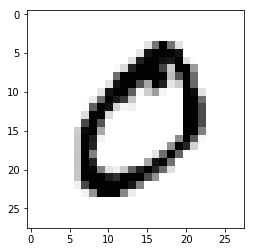

In [112]:
all_values=data_list[1].split(',')
image_array=np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')